<a href="https://colab.research.google.com/github/DucTranVan/point_relative_polygon/blob/main/SortingArrayFunctionTask_1_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
  Implementing Sorting Array Function Problem
## Expected performance
This function is designed to sort an array containing unique elements (from 0 to 9). The length of this array can be varied from 2 to 10.
## Input
An array A contains unique n-elements, whose values are integers. The length (n) of A is range
from 2 to 10.
## Output
Sorted array B in ascending order. The length of array B must be the same to A.
## Examples
* Test case 1: A = [3,0] -> B = [0,3]
* Test case 2: A = [1,3,2] -> B = [1,2,3]
* Test case 3: A = [5,9,1,3,7] -> B = [1,3,5,7,9]
* Test case 4: A = [9,8,7,6,5,4,3,2,1] -> B = [1,2,3,4,5,6,7,8,9]
* Test case 5: ...

# Main Idea

* Apply **OOP paradigm** to design the class with clear Api for user-friendly and easier to read in the future
* Elaborating about the problem sparks me more than one algorithms in which each one optimizes for different usage context with respective trade-off. Because this is to access my coding and analysis skill, so instead just provie the most simple solution, I will implement a family of algorithms for this task and let the user to choose what suitable for their situation
* Starting built a classical algorithm, then try out some Machine Learning approaches 

# Implementation
* To write code for easy to use and high security, I will try to apply encapsulation, abstraction, inheritance, and polymorphism principle of OOP paradigm. 
* To wirte codes that easy for extend in the future,I will apply **Strategy Design Pattern** .
This application design pattern will helps define a family of algorithms, put each of them into a separate class, and make their objects interchangeable.   


## Strategy Design Pattern Skeleton

In [ ]:
from __future__ import annotations
from abc import ABC, abstractmethod
from typing import List


class SortingArrayFunction():
    """
    The SortingArrayFunction class defines the interface of interest to clients.
    """

    def __init__(self, sorting_strategy: SortingStrategy) -> None:
        """
        The SortingArrayFunction class accepts a strategy through the constructor, but
        also provides a setter to change it at runtime.
        """

        self._strategy = sorting_strategy

    @property
    def strategy(self) -> SortingStrategy:
        """
        The SortingArrayFunction class maintains a reference to one of the Strategy objects. This
        class does not know the concrete class of a strategy. It should work
        with all strategies via the Strategy interface.
        """

        return self._strategy

    @strategy.setter
    def strategy(self, sorting_strategy: SortingStrategyegy) -> None:
        """
        Usually, the Context allows replacing a Strategy object at runtime.
        """

        self._strategy = sorting_strategy

    def sort(self, input_array: List) -> List:
        """
        The SortingArrayFunction class delegates some work to the Strategy object instead of
        implementing multiple versions of the algorithm on its own.
        """

        # ...

        print("SortingArrayFunction: Sorting data using the strategy (not sure how it'll do it)")
        sorted_array = self._strategy.do_sort(input_array)
        return sorted_array

        # ...


class SortingStrategy(ABC):
    """
    The Strategy interface declares operations common to all supported versions
    of some algorithm.

    The SortingArrayFunction class uses this interface to call the sorting algorithm defined by Concrete
    Strategies.
    """

    @abstractmethod
    def do_sort(self, data: List):
        pass


## Concrete Sorting Strategies Implement

* Concrete Strategies implement the algorithm while following the base **SortingStrategy**
interface. 
* The interface makes them interchangeable in the **SortingArrayFunction** Instance.
* The Experiment code will picks a concrete sorting strategy and passes it to the SortingArrayFunction to use.



### 1. Python's built-in sorted() function

Sorting problem is already solved by classical methods (e.g. quicksort). The codes below implements a Strategy using classical algorithm at utilize the built-in sorted function of Python.

In [ ]:
# My simplest solution :))
class BuiltInStaregy(SortingStrategy):
    def do_sort(self, data: List) -> List:
        return sorted(data)
 

#### Using the algorithms with core class

In [ ]:
# Example of codes that injects an BuiltInStaregy object to the SortingArrayFunction object 

sorting_array_function = SortingArrayFunction(BuiltInStaregy())
print("Experiment: Strategy is set to BuiltInStaregy sorting.")
input_array = [1, 5, 0, 9]
sorted_array = sorting_array_function.sort(input_array)
print("input array: ", input_array)
print("sorted array",sorted_array)

Experiment: Strategy is set to BuiltInStaregy sorting.
SortingArrayFunction: Sorting data using the strategy (not sure how it'll do it)
input array:  [1, 5, 0, 9]
sorted array [0, 1, 5, 9]


### 2. ML based strategy
First I will try to reframe the sorting problem to the machine learning problem. Formally setting, sorting function can be represented by some many to many function which takes an input an arbitarly arranged vector and it generates the sorted vector as output. The input vector's element is intergers from 0 to 9 and it's length vary from 2 to 10.

#### Data generating and encoding

* Generate the data set 
* The length of input array can be varied from 2 to 10 and it's length is range from 2 to 10 -> padding input array with number 10 -> The input sequence to the neural network will have fixed lenth -> encode the inpuet sequences as one hot encoding.  





In [ ]:
import numpy as np
np.random.seed(42) # setting random seed for get reproducible result in the future
DATASET_SIZE= 50000
MAX_LEN = 10
MAX_NUMBER = 10
x = np.zeros((DATASET_SIZE, MAX_LEN, MAX_NUMBER +1), dtype=np.bool)
y = np.zeros((DATASET_SIZE, MAX_LEN, MAX_NUMBER +1), dtype=np.bool)

X = []
Y = []

for i in range(DATASET_SIZE):
  permutation = np.random.permutation(MAX_NUMBER)
  sequence_len = np.random.randint(2,11)

  for j in range(sequence_len, MAX_NUMBER):
    permutation[j] = MAX_NUMBER

  label = np.sort(permutation)
  X.append(permutation)
  Y.append(label)

for ind,matrix in enumerate(X):
    for j, elem in enumerate(matrix):
        x[ind, j, elem] = 1

for ind,matrix in enumerate(Y):
    for j, elem in enumerate(matrix):
        y[ind, j, elem] = 1

print("Total input sequences:", len(x))

Total input sequences: 50000


In [ ]:
# Explicitly set apart 10% for validation data that we never train over.
split_at = len(x) - len(x) // 10
(x_train, x_val) = x[:split_at], x[split_at:]
(y_train, y_val) = y[:split_at], y[split_at:]

(X_train, X_val) = X[:split_at], X[split_at:]
(Y_train, Y_val) = Y[:split_at], Y[split_at:]

print("Training Data:")
print(x_train.shape)
print(y_train.shape)

print("Validation Data:")
print(x_val.shape)
print(y_val.shape)

Training Data:
(45000, 10, 11)
(45000, 10, 11)
Validation Data:
(5000, 10, 11)
(5000, 10, 11)


#### Baseline idea
This problem can be viewed as the task that requires us to learn a function which maps  sequences numbers to permutation of the input sequences that has ascending order.
From the nattural structure of the problem, I will make an experiment using an Seq2seq model architecture as a baseline solution for the problem.

In [ ]:
# Build model
from tensorflow import keras
from tensorflow.keras import layers

num_layers = 1

model = keras.Sequential()
model.add(layers.LSTM(128, input_shape=(MAX_LEN, MAX_NUMBER + 1)))
from tensorflow.keras import layers
model.add(layers.Dropout(0.25))
model.add(layers.RepeatVector(MAX_LEN))

for _ in range(num_layers):
    model.add(layers.LSTM(128, return_sequences=True))

model.add(layers.Dropout(0.5))
model.add(layers.Dense(MAX_NUMBER + 1, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               71680     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 10, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
dense (Dense)                (None, 10, 11)            1419      
Total params: 204,683
Trainable params: 204,683
Non-trainable params: 0
__________________________________________________

[0.8092150092124939, 0.9762275218963623, 0.9922574758529663, 0.9935625195503235, 0.9953699707984924, 0.9974700212478638, 0.9973300099372864, 0.9978024959564209, 0.9973549842834473, 0.9985600113868713, 0.9983274936676025, 0.9978824853897095, 0.9995499849319458, 0.9983000159263611, 0.9980025291442871, 0.9995275139808655, 0.9986674785614014, 0.9990925192832947]
[0.9842900037765503, 0.9625800251960754, 1.0, 1.0, 0.9995899796485901, 0.9992300271987915, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9998999834060669, 1.0, 1.0, 1.0, 1.0, 1.0]


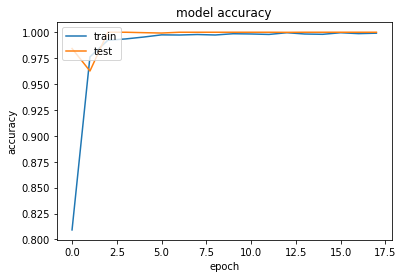

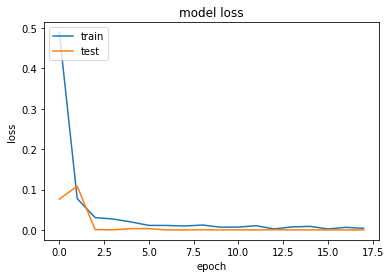

In [ ]:
# Training and Evaluating

import matplotlib.pyplot as plt
history = model.fit(x, y, validation_split=0.2, epochs=18, batch_size=32, verbose=0)
print(history.history['accuracy'])
print(history.history['val_accuracy'])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Select 5 samples from the validation set at random so we can visualize errors.
for i in range(5):
    ind = np.random.randint(0, len(x_val))
    rowx, rowy = x_val[np.array([ind])], y_val[np.array([ind])]
    preds = np.argmax(model.predict(rowx), axis=-1)

    rowX, rowY = X_val[ind], Y_val[ind]
    input = [i for i in rowX if i < 10]
    label = [i for i in rowY if i < 10]
    print("input: ", input)
    print("label: ", label)
    print("prediction: ", preds[0][:len(label)])

input:  [9, 7, 1, 0, 6, 5, 2, 8, 4, 3]
label:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
prediction:  [0 1 2 3 4 5 6 7 8 9]
input:  [5, 8, 6, 9]
label:  [5, 6, 8, 9]
prediction:  [5 6 8 9]
input:  [2, 9, 0, 4, 3, 5, 7, 8]
label:  [0, 2, 3, 4, 5, 7, 8, 9]
prediction:  [0 2 3 4 5 7 8 9]
input:  [4, 2, 7, 9, 8, 6, 3, 0]
label:  [0, 2, 3, 4, 6, 7, 8, 9]
prediction:  [0 2 3 4 6 7 8 9]
input:  [7, 0, 4, 9, 5]
label:  [0, 4, 5, 7, 9]
prediction:  [0 4 5 7 9]


In [ ]:
# save model
model.save("seq2seq-1.0.1")

INFO:tensorflow:Assets written to: seq2seq-1.0.1/assets


INFO:tensorflow:Assets written to: seq2seq-1.0.1/assets


#### Using the model with the main class

In [ ]:

class Seq2SeqStaregy(SortingStrategy):
    def __init__(self, model_path):
      self.__model = keras.models.load_model("seq2seq-1.0.1")
    def __encode(self, input):
      input_array = input.copy()
      lack = 10 - len(input_array)

      for i in range(lack):
        input_array.append(MAX_NUMBER)

      encoded_input = np.zeros((1, MAX_LEN, MAX_NUMBER +1), dtype=np.bool)
      for i, elem in enumerate(input_array):
        encoded_input[0][i,elem] = 1
      return encoded_input

    def do_sort(self, data: List) -> List:
      encoded_input = self.__encode(data)
      preds = np.argmax(self.__model.predict(encoded_input), axis=-1)
      sorted_array =  preds[0][:len(data)]
      return sorted_array

In [ ]:
# Example of codes that injects an Seq2SeqStaregy object to the SortingArrayFunction object 

sorting_array_function = SortingArrayFunction(Seq2SeqStaregy(model_path="seq2seq"))
print("Experiment: Strategy is set to BuiltInStaregy sorting.")
input_array =  [7, 3, 4, 1]
sorted_array = sorting_array_function.sort(input_array)
print("input array: ", input_array)
print("sorted array",sorted_array)

Experiment: Strategy is set to BuiltInStaregy sorting.
SortingArrayFunction: Sorting data using the strategy (not sure how it'll do it)
input array:  [7, 3, 4, 1]
sorted array [1 3 4 7]


# Some other promise approaches

* CNN based : intuitively, pooling operation seem to be promise beacause the max pooling for example can use to deal with the order of number
* Attention mechanism: why not try ?
* Pointer Networks: https://arxiv.org/pdf/1506.03134.pdf